In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
tunnel = pd.read_csv('tunnel.csv')
tunnel = tunnel.set_index("Day")
tunnel.head()



,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [6]:
df = tunnel.copy()
df['Time']=np.arange(len(tunnel.index))

In [7]:
from sklearn.linear_model import LinearRegression
X = df.loc[:,['Time']]
y=df.loc[:, 'NumVehicles']

In [8]:
model = LinearRegression()
model.fit(X,y)


LinearRegression()

In [9]:
df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [10]:
X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)
y=df.loc[:,'NumVehicles']
y,X=y.align(X,join='inner')
model.fit(X,y)

LinearRegression()

In [11]:
y_pred = pd.Series(model.predict(X), index=X.index)
y_pred

Day
2003-11-02    104961.799284
2003-11-03     98840.684037
2003-11-04    103500.939302
2003-11-05    104330.767464
2003-11-06    106578.285356
                  ...      
2005-11-12    117280.776890
2005-11-13    105553.391615
2005-11-14    100105.412508
2005-11-15    109560.763451
2005-11-16    110696.514134
Length: 746, dtype: float64

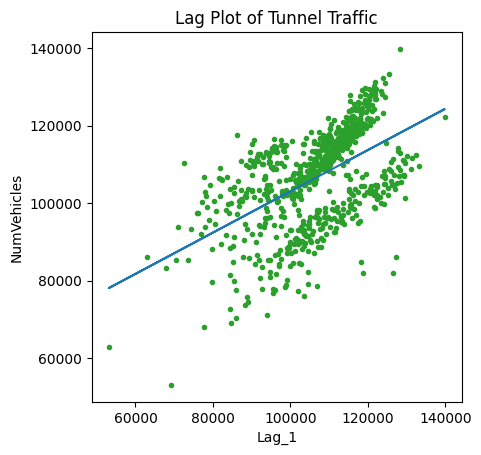

In [12]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', c='#2ca02c')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic');


Upto above is enough no need th below code

In [13]:
df = pd.read_csv('book_sales.csv',index_col='Date',parse_dates=['Date']).drop('Paperback',axis=1)

In [14]:
df.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


In [15]:
df['Time'] = np.arange(len(df.index))

C:\Users\Hariprasath\AppData\Local\Temp\ipykernel_13504\753689752.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


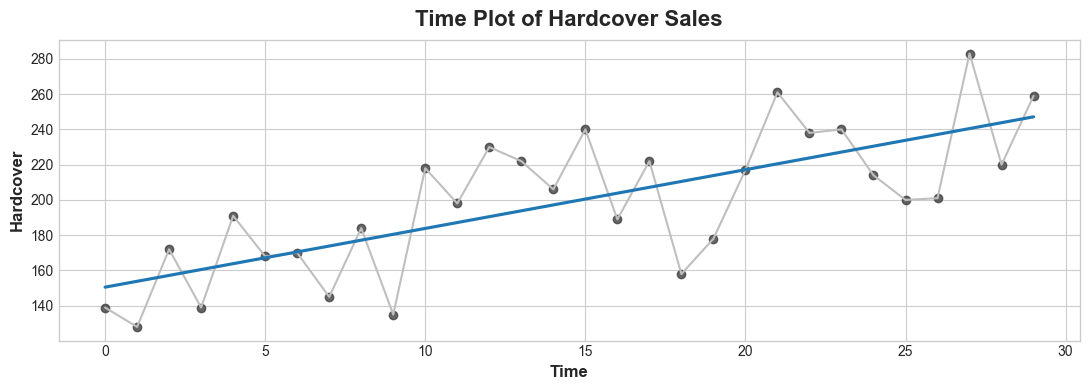

In [16]:
  plt.style.use("seaborn-whitegrid")
  plt.rc(
      "figure",
      autolayout=True,
      figsize=(11, 4),
      titlesize=18,
      titleweight='bold',
  )
  plt.rc(
      "axes",
      labelweight="bold",
      labelsize="large",
      titleweight="bold",
      titlesize=16,
      titlepad=10,
  )
  fig, ax = plt.subplots()
  ax.plot('Time', 'Hardcover', data=df, color='0.75')
  ax = sns.regplot(x='Time', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
  ax.set_title('Time Plot of Hardcover Sales');

In [17]:
df['Lag_1']=df['Hardcover'].shift(1)
df=df.reindex(columns=['Hardcover','Lag_1'])
df.head()

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


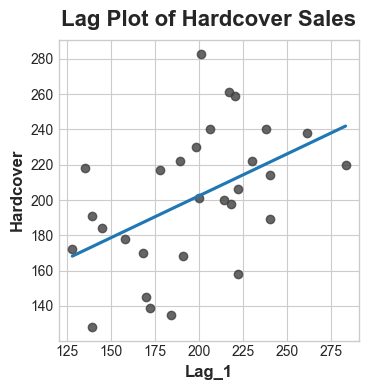

In [18]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales');